### **Dylan Bermudez Cardona - Juan José López López - Sara Cardona Vásquez**

# **Ingenio Providencia - Inteligencia Artificial**

Tenemos un conjunto de datos históricos del ingenio azucarero **Ingenio La Providencia**, el cual contiene información relevante sobre la producción de caña de azúcar. El objetivo principal es desarrollar un modelo de inteligencia artificial capaz de predecir dos variables clave:

- **Toneladas de caña por hectárea (TCH):** Esta métrica nos indica la productividad de la tierra.
- **Porcentaje de sacarosa (%Sac.Caña):** Representa la calidad de la caña, es decir, la cantidad de azúcar extraíble.

Al poder predecir estas variables, el ingenio podrá tomar decisiones más informadas y eficientes en cuanto a:

- **Planificación de la producción:** Anticipar la cantidad de caña que se obtendrá y, por ende, ajustar los procesos de producción.
- **Optimización de recursos:** Asignar recursos de manera más eficiente, como fertilizantes, agua o mano de obra, en función de las predicciones.
- **Mejora de la calidad:** Identificar factores que influyen en la calidad de la caña y tomar medidas para mejorarla.

## **Análisis Exploratorio de Datos (EDA)**

El EDA es la primera y fundamental etapa en cualquier proyecto de ciencia de datos. En este caso, el EDA nos permitirá:

- **Comprender los datos:** Familiarizarnos con la estructura, el tipo de datos (numéricos, categóricos), y el rango de valores de cada variable.
- **Detectar patrones:** Identificar relaciones entre variables, tendencias a lo largo del tiempo y valores atípicos.
- **Limpiar los datos:** Corregir errores, eliminar datos duplicados o inconsistentes, y manejar valores faltantes.
- **Seleccionar las características relevantes:** Identificar las variables que tienen un mayor impacto en las variables objetivo.
- **Generar hipótesis:** Formular preguntas de investigación que puedan ser respondidas mediante modelos predictivos.

Por otro lado, el EDA exhaustivo nos proporcionará una base sólida para construir un modelo de predicción robusto y confiable. Algunos beneficios específicos incluyen:

- **Mejorar la precisión de las predicciones:** Al comprender mejor los datos, podemos seleccionar las características más relevantes y aplicar las técnicas de modelado adecuadas.
- **Identificar variables ocultas:** El EDA puede revelar variables que no habíamos considerado inicialmente y que pueden ser importantes para mejorar la precisión del modelo.
- **Evitar el sobreajuste:** Al comprender los patrones en los datos, podemos evitar modelos demasiado complejos que se ajustan demasiado bien a los datos de entrenamiento pero no generalizan bien a nuevos datos.
- **Aumentar la interpretabilidad del modelo:** Un EDA bien realizado nos ayuda a entender cómo las variables influyen en las predicciones, lo que facilita la interpretación de los resultados del modelo.

A continuación, desarrollamos el EDA:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Cargue de datos**

Cargamos los datos utilizando la librería `pandas` y vemos sus primeros datos. Lo definimos como un dataframe.

In [149]:
# cargar archivo excel (.xlsx)
df = pd.read_excel("HISTORICO_SUERTES.xlsx")

Vemos las dimensiones de los datos cargados:

In [151]:
# dimensiones del dataframe
df.shape

(21027, 85)

El dataframe tiene $21027$ registros (filas) y $85$ atributos (columnas)

### **Vista preliminar**

Obtenemos las medidas de tendencia central, columnas, variables y tipos del dataframe.

In [153]:
# visualizamos los 5 primeros registros
df.head()

,Período,Hacienda,Nombre,Zona,Tenencia,Suerte,Suelo,Area Neta,Dist Km,Variedad,...,Humedad Rel Media Ciclo,Oscilacion Temp Med 0-3,Oscilacion Temp Ciclo,Sum Oscilacion Temp Ciclo,Radicion Solar 0-3,Radiacion Solar Ciclo,Precipitacion 0_3,Precipitacion Ciclo,Evaporacion 0-3,Evaporacion Ciclo
0,201701,80493,LA CONCHA,IP02,51.0,002A,CANTARINA,6.00,4.3,CC85-92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201701,81284,UKRANIA INCAUCA,IP05,81.0,039B,NaN,1.45,NaN,CC85-92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201701,80203,EL AMPARO SAA,IP05,31.0,007,CORINTIAS,8.24,23.0,CC01-1228,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201701,81380,SAN JUDAS INCAUCA,IP05,82.0,013A,NaN,1.05,66.5,CC01-1940,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201701,80298,JAVA,IP06,31.0,025A,GALPON,4.53,17.0,RB73-2223,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
# visualizamos los 5 últimos registros
df.tail()

,Período,Hacienda,Nombre,Zona,Tenencia,Suerte,Suelo,Area Neta,Dist Km,Variedad,...,Humedad Rel Media Ciclo,Oscilacion Temp Med 0-3,Oscilacion Temp Ciclo,Sum Oscilacion Temp Ciclo,Radicion Solar 0-3,Radiacion Solar Ciclo,Precipitacion 0_3,Precipitacion Ciclo,Evaporacion 0-3,Evaporacion Ciclo
21022,202407,80102,LA PAZ,IP01,11.0,051B,LA PAZ,3.00,1.8,CC05-430,...,78.797,16.4,31.089,NaN,467.043,444.382,177.3,1037.8,542.2,1824.6
21023,202407,80102,LA PAZ,IP01,11.0,054C,LA PAZ,1.22,1.8,CC05-430,...,78.704,17.8,30.945,NaN,461.663,444.528,168.7,1041.6,536.4,1867.2
21024,202407,80102,LA PAZ,IP01,11.0,054E,LA PAZ,1.85,1.8,CC05-430,...,78.704,17.8,30.945,NaN,461.663,444.528,168.7,1041.6,536.4,1867.2
21025,202407,80104,SAMARIA,IP02,11.0,165,PALMIRA,31.42,3.5,CC05-430,...,78.720,17.8,31.040,NaN,467.911,444.839,177.3,1037.8,544.2,1843.9
21026,202407,80124,SANTA LUCIA,IP02,11.0,001,CORINTIAS,2.22,1.1,CC05-430,...,78.687,17.8,30.890,NaN,459.274,444.372,119.8,1041.6,532.5,1881.2


In [157]:
# obtenemos las medidas de tendencia central de los atributos numéricos
df.describe()

,Período,Hacienda,Tenencia,Area Neta,Dist Km,Cod.Estado #,F.Siembra,Ult.Riego,Edad Ult Cos,F.Ult.Corte,...,Humedad Rel Media Ciclo,Oscilacion Temp Med 0-3,Oscilacion Temp Ciclo,Sum Oscilacion Temp Ciclo,Radicion Solar 0-3,Radiacion Solar Ciclo,Precipitacion 0_3,Precipitacion Ciclo,Evaporacion 0-3,Evaporacion Ciclo
count,21027.000000,21027.000000,21026.000000,21027.000000,21022.000000,21027.000000,21027,8470,21027.00000,21027,...,4530.000000,4530.000000,4530.000000,0.0,4530.000000,4530.000000,4530.000000,4530.000000,4530.000000,4530.000000
mean,202039.708708,80679.334427,46.448730,8.642948,25.311806,4.261806,2015-03-11 18:18:44.839492096,2020-02-16 21:24:26.351829760,13.01111,2020-10-27 09:01:09.339420672,...,80.764679,16.059757,24.556072,NaN,435.119397,438.344500,298.258587,1209.462980,442.941369,1912.479868
min,201701.000000,80100.000000,11.000000,0.004000,1.100000,0.000000,1986-04-30 00:00:00,2016-01-12 00:00:00,1.31000,2017-01-02 00:00:00,...,63.327000,12.500000,22.353000,NaN,352.013000,367.315000,23.100000,23.100000,190.400000,190.400000
25%,201812.000000,80247.000000,31.000000,3.310000,12.000000,1.000000,2013-03-13 00:00:00,2018-03-07 00:00:00,11.93000,2018-12-14 00:00:00,...,80.038000,15.200000,22.946250,NaN,421.344750,426.533250,221.650000,998.900000,416.800000,1729.900000
50%,202010.000000,80453.000000,51.000000,7.000000,21.900000,3.000000,2015-11-10 00:00:00,2019-08-14 00:00:00,12.62000,2020-10-11 00:00:00,...,81.291500,15.700000,23.201500,NaN,436.591000,439.140000,296.900000,1181.150000,440.950000,1885.200000
75%,202209.000000,81104.000000,51.000000,12.075000,32.700000,6.000000,2018-08-07 00:00:00,2022-05-19 00:00:00,13.86000,2022-09-25 00:00:00,...,82.440500,16.800000,25.660000,NaN,449.274000,450.391000,373.300000,1391.850000,465.800000,2057.800000
max,202407.000000,82557.000000,91.000000,65.000000,155.000000,31.000000,2023-09-08 00:00:00,2024-06-27 00:00:00,78.19000,2024-07-10 00:00:00,...,84.816000,19.700000,32.358000,NaN,500.212000,485.672000,618.000000,3783.700000,614.300000,4971.800000
std,216.642895,590.030150,21.513498,7.049533,18.237344,4.111935,NaN,NaN,1.97907,NaN,...,2.752029,1.300131,2.471964,NaN,21.307392,18.582606,102.901635,340.463189,43.680452,307.978328


Según el anterior resultado, es evidente que tenemos columnas de fechas, lo que puede ser crucial para ver los momentos de siembra, de riego de cultivos. Por otro lado, obtuvimos $71$ columnas, lo que indica que los $14$ atributos restantes no son numéricos, es decir, son categóricos. A su vez, distintas columnas, como por ejemplo `Dist Km`, en el valor `count` (que es el conteo de todos los registros no nulos) no poseen el total de $21027$, lo que indica valores nulos.

In [159]:
# columnas, count y tipo del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 85 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Período                    21027 non-null  int64         
 1   Hacienda                   21027 non-null  int64         
 2   Nombre                     21027 non-null  object        
 3   Zona                       21027 non-null  object        
 4   Tenencia                   21026 non-null  float64       
 5   Suerte                     21027 non-null  object        
 6   Suelo                      17269 non-null  object        
 7   Area Neta                  21027 non-null  float64       
 8   Dist Km                    21022 non-null  float64       
 9   Variedad                   21027 non-null  object        
 10  Cod.Estado #               21027 non-null  int64         
 11  Cod.Estado                 21027 non-null  object        
 12  F.Si

Los anteriores son los $85$ atributos de los datos, su respectivo conteo de registros no nulos y el tipo de los datos.

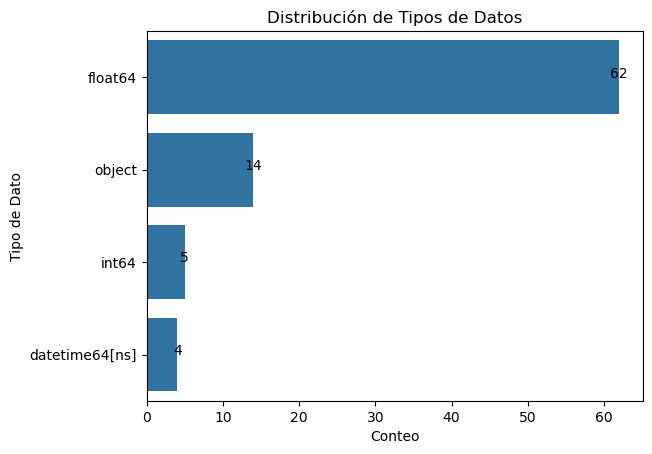

In [161]:
# visualizamos la distribución de los tipos de los datos de las columnas del dataframe
# crear un df con los tipos de datos y su conteo
dtype_counts = df.dtypes.value_counts()
dtype_df = pd.DataFrame({'Tipo de Dato': dtype_counts.index, 'Conteo': dtype_counts.values})

# tabla
sns.barplot(x='Conteo', y='Tipo de Dato', data=dtype_df)

# frecuencias sobre cada barra
for index, row in dtype_df.iterrows():
    plt.text(row.Conteo, index, row.Conteo, color='black', ha="center")

plt.title('Distribución de Tipos de Datos')
plt.show()

Con el anterior gráfico nos queda claro que la mayoría ($67$) de los atributos son de tipo numérico. A su vez, que $14$ de ellos son de tipo categórico (etiquetas, texto) y los restantes ($4$) son de tipo fecha.

### **Limpieza de los Datos**

Haremos la limpieza de los datos que poseemos para decidir qué hacer y cómo tratar con los datos faltantes (eliminar, imputar o solicitar más información). Asimismo, eliminaremos aquellos registros duplicados.

In [163]:
# copia del dataframe original - buena práctica
df_copy = df.copy()

In [165]:
# registros duplicados:
print("Número de registros duplicados:", df.duplicated().sum())

# eliminar los registros duplicados:
df_copy = df.drop_duplicates()

Número de registros duplicados: 0


Como vimos no tenemos registros duplicados, aún así, nos aseguramos de eliminarlos en caso de que hubieran.

In [167]:
# análisis de datos faltantes
missing_data = df_copy.isnull().sum().sort_values(ascending=False)
missing_percent = 100 * df_copy.isnull().sum() / len(df_copy)
total_data = len(df_copy)
print(f"Total Data {total_data}")

missing_table = pd.concat([missing_data, missing_percent], axis=1, keys=['Total Missing Data', 'Missing Percent'])
print(missing_table[missing_table['Missing Percent'] > 0])

Total Data 21027
                           Total Missing Data  Missing Percent
Fert.Nitrogen.                          21027       100.000000
Sum Oscilacion Temp Ciclo               21027       100.000000
Urea 46%                                20304        96.561564
NITRAX-S                                20279        96.442669
MEZ                                     20056        95.382128
MicroZinc                               19878        94.535597
Boro Granul.                            19742        93.888810
Sul.Amonio                              19670        93.546393
NITO_XTEND                              17348        82.503448
Vinaza                                  16929        80.510772
Temp. Media 0-3                         16497        78.456271
Temp. Media Ciclo                       16497        78.456271
Temp Max Ciclo                          16497        78.456271
Temp Min Ciclo                          16497        78.456271
Evaporacion Ciclo                     

Con el anterior código analizamos cada atributo con datos faltantes, de manera que obtenemos la cantidad total de registros vacíos o faltantaes y la proporción de estos respecto al total de registros de los datos ($21027$). Aquellos atributos que posean todos sus registros no son tomados en cuenta en la tabla.

In [169]:
# filtrar columnas de interés
filtered_missing = pd.DataFrame({'Atributo': ['%Sac.Caña', 'TCH'],
                                 'Total Missing Data': missing_data[missing_data.index.isin(['%Sac.Caña', 'TCH'])],
                                 'Missing Percent': missing_percent[missing_percent.index.isin(['%Sac.Caña', 'TCH'])]})

# imprimir la tabla filtrada
print(filtered_missing)

            Atributo  Total Missing Data  Missing Percent
%Sac.Caña  %Sac.Caña                 449          2.13535
TCH              TCH                   0          0.00000


Es importante revisar los atributos de interés, es decir, nuestras variables objetivo, para así saber si es viable realizar el modelo según su porcentaje de datos faltantes y cómo tratarlos. Es claro que **TCH** tiene $0\%$ registros faltantes, mientras que **\%Sac.Caña** tiene $2.13535\%$ registros faltantes.

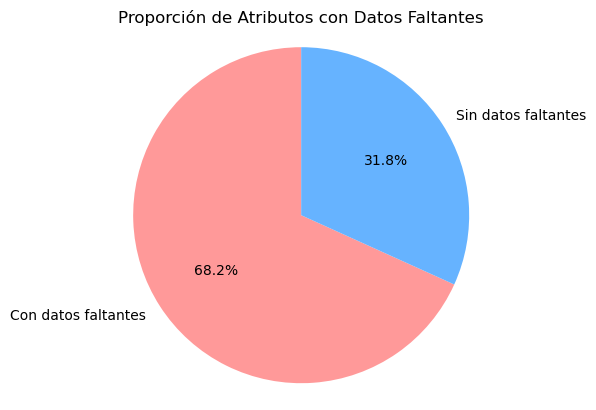

In [171]:
# dos categorías basadas en si hay datos faltantes o no
missing_data_bool = (missing_data > 0)
has_missing_data = missing_data_bool.sum()
no_missing_data = len(missing_data) - has_missing_data

# datos para el diagrama de torta
labels = ['Con datos faltantes', 'Sin datos faltantes']
sizes = [has_missing_data, no_missing_data]
colors = ['#ff9999', '#66b3ff']  # Colores personalizados (ajusta a tu gusto)

# diagrama de torta
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Para hacer el círculo perfecto
plt.title('Proporción de Atributos con Datos Faltantes')
plt.show()

Es evidente, según el diagrama anterior, que hay un gran porcentaje ($68.2\%$) de datos faltantes en los atributos (columnas) de los datos, por lo que es necesario prestarle una gran atención y cuidado al trato de estos registros.

Así, hemos decidido definir condiciones para el tratamiento de datos faltantes, donde $x$ es el porcentaje de datos faltantes del atributo:

- **$x \geq 75\%$**: **Eliminar**, ya que con un porcentaje tan alto de datos faltantes, la información contenida en esos atributos es prácticamente nula y podría introducir sesgos en el análisis.
- **$20\% \leq x < 75\%$**: **Analizar correlación**, porque al analizar la correlación con otros atributos, es posible identificar si existe alguna relación que permita imputar los valores faltantes de forma más precisa o si es mejor eliminar el atributo.
- **$x < 20\%$**: **Imputación de datos**, pues con un porcentaje relativamente bajo de datos faltantes, la imputación puede ayudar a conservar la información y mejorar la calidad del análisis.

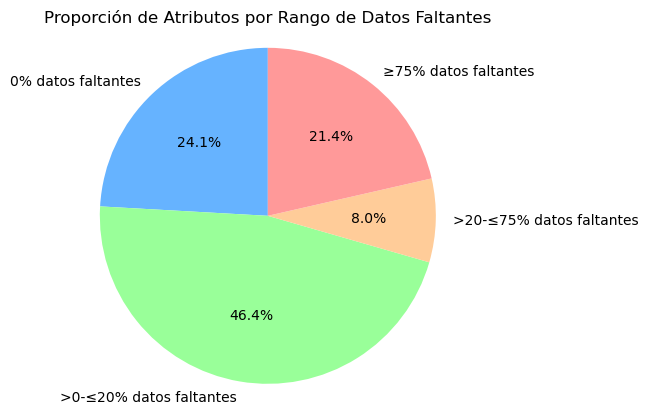

In [173]:
# identificamos los missing values visualmente
# sns.heatmap(df_copy.isnull(), cbar=False)

# definir los rangos de porcentaje de datos faltantes
rango_0 = missing_percent[missing_percent == 0]
rango_20 = missing_percent[(missing_percent >= 0) & (missing_percent < 20)]
rango_75 = missing_percent[(missing_percent >= 20) & (missing_percent < 75)]
rango_100 = missing_percent[missing_percent >= 75]

# datos para el gráfico de torta
labels = ['0% datos faltantes', '>0-≤20% datos faltantes', '>20-≤75% datos faltantes', '≥75% datos faltantes']
sizes = [len(rango_0), len(rango_20), len(rango_75), len(rango_100)]
colors = ['#66b3ff', '#99ff99', '#ffcc99', '#ff9999']

# gráfico de torta
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Proporción de Atributos por Rango de Datos Faltantes')
plt.show()

Vemos la distribución de los datos que poseemos según las condiciones que previamente definimos. Es claro que el $29.4\%$ de los datos poseen más de un $20\%$ de sus datos faltantes. Así, aplicamos las acciones:

In [175]:
# copiamos el dataframe previamente utilizado, vamos a modificarlo
df_clean = df_copy.copy()

#### **Eliminar atributos ($x \geq 75\%$)**

In [177]:
# obtener los nombres de las columnas a eliminar
columnas_a_eliminar = missing_percent[missing_percent >= 75].index

# eliminar las columnas del df
df_clean = df_copy.drop(columnas_a_eliminar, axis=1)

Eliminamos las columnas con un porcentaje de datos faltantes mayor o igual a $75\%$ como ya habíamos definido en las condiciones.

#### **Analizar correlación ($20\% \leq x < 75\%$)**

                 %Infest.Diatrea  %Sac.Caña  Edad.Precosecha  Num.Riegos  \
%Infest.Diatrea         1.000000  -0.043342         0.120878   -0.096192   
%Sac.Caña              -0.043342   1.000000        -0.098040   -0.034671   
Edad.Precosecha         0.120878  -0.098040         1.000000   -0.054453   
Num.Riegos             -0.096192  -0.034671        -0.054453    1.000000   
Semanas mad.           -0.005453   0.043971         0.384432    0.016935   
TCH                     0.102551  -0.168060         0.168624   -0.036432   

                 Semanas mad.       TCH  
%Infest.Diatrea     -0.005453  0.102551  
%Sac.Caña            0.043971 -0.168060  
Edad.Precosecha      0.384432  0.168624  
Num.Riegos           0.016935 -0.036432  
Semanas mad.         1.000000  0.026300  
TCH                  0.026300  1.000000  


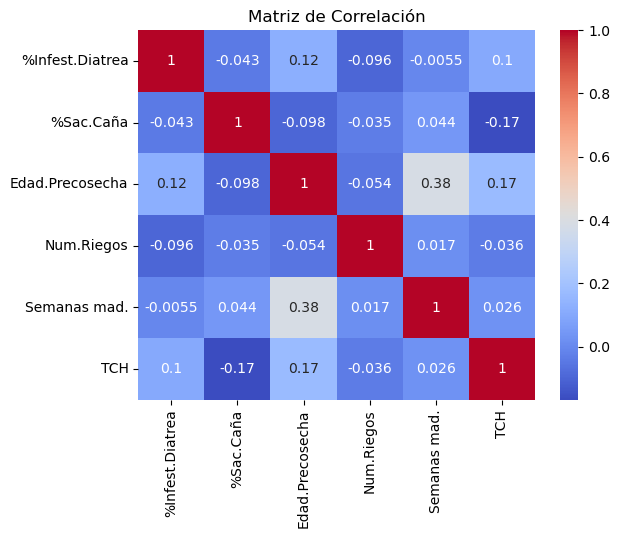

In [179]:
# target variables
columnas_especificas = ['TCH', '%Sac.Caña']

# subconjunto del df con las columnas a analizar y las específicas
columnas_a_analizar = missing_percent[(missing_percent >= 20) & (missing_percent < 75)].index
columnas_a_analizar = columnas_a_analizar.union(columnas_especificas)

# df con las columnas a analizar
df_subconjunto = df_clean[columnas_a_analizar]

# columnas numéricas
df_numerico = df_subconjunto.select_dtypes(include=['number'])

# matriz de correlación
corr_matrix = df_numerico.corr()
print(corr_matrix)

# visualizar
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')

plt.show()

El anterior gráfico representa la matriz de correlación teniendo en cuenta las variables objetivo y los atributos delimitados en el rango de la condición. Es importante ver aquellos atributos que poseen una correlación significativa con las variables objetivo. Así:

- **%Sac.Caña**: Ningún atributo tiene una relación signficativa.
- **TCH**: Los atributos **%Infest.Diatrea** ($0.1$) y **Edad.Precosecha** ($0.17$), tienen una relación directa débil.

Ahora, debemos entonces analizar la relación colineal de **%Infest.Diatrea** y **Edad.Precosecha**, pues si tienen una significativa con otros atributos es importante mantenerlos ya que afectan a sus valores. Así:

- **%Infest.Diatrea**: El atributo **Edad.Precosecha** ($0.12$) tiene una relación directa débil.
- **Edad.Precosecha**: El atributo **Semanas mad.** ($0.38$) tiene una relación directa moderada y el atributo **%Infest.Diatrea** ($0.12$) tiene una relación directa débil.

Según lo anterior, decidimos mantener los atributos **%Infest.Diatrea**, **Edad.Precosecha** y **Semanas mad.**, para posteriormente realizarles imputación de datos con el resto de atributos restantes.

In [181]:
# eliminamos atributo Num.Riegos
df_clean = df_clean.drop('Num.Riegos', axis=1)

Ya habiendo eliminado las anteriores columnas, verifiquemos cuántos atributos poseemos:

In [183]:
# filas - columnas
df_clean.shape

(21027, 60)

Ahora tenemos $60$ atributos, es decir, eliminamos $25$.

#### **Imputación de datos ($x \leq 20\%$)**

Recordemos que la imputación de datos es el proceso donde se reemplazan los valores faltantes en un conjunto de datos con estimaciones razonables. Así pues, para los datos faltantes en atributos numéricos utilizaremos la **Media** como valor de reemplazo, es decir, obtendremos la media de ese atributo y lo colocaremos en lugar de los valores faltantes. Asimismo, para los datos faltantes en atributos categóricos (etiquetas, texto) utilizaremos la **Moda** para reemplazarlos, utilizando la misma lógica explicada.

In [185]:
# imputación de datos faltantes
def imputar_datos(df):
    for col in df.columns:
        # es numérica, imputar con la media
        if df[col].dtype in ['float64', 'int64']:
            media = df[col].mean()
            df[col] = df[col].fillna(media)
        
        # es de tipo datetime, imputar con la moda (fecha más frecuente)
        elif df[col].dtype == 'datetime64[ns]':
            moda = df[col].mode()[0]
            df[col] = df[col].fillna(moda)
        
        # es categórica (objetos), imputar con la moda
        elif df[col].dtype == 'object':
            moda = df[col].mode()[0]
            df[col] = df[col].fillna(moda)
    
    return df

Definimos la función `imputar_datos(df)`, la cual imputa los datos en el dataframe pasado por parámetro dependiendo si el atributo que está analizando es numérico (**media**), fecha (**moda**) o categórico (**moda**).

In [187]:
# imputación
df_clean = imputar_datos(df_clean)

# verificamos nulos en los atributos
df_clean.isnull().sum()

Período                   0
Hacienda                  0
Nombre                    0
Zona                      0
Tenencia                  0
Suerte                    0
Suelo                     0
Area Neta                 0
Dist Km                   0
Variedad                  0
Cod.Estado #              0
Cod.Estado                0
F.Siembra                 0
D.S.                      0
Ult.Riego                 0
Edad Ult Cos              0
F.Ult.Corte               0
Destino 1=Semilla         0
Cod. T.Cultivo            0
Cultivo                   0
Fec.Madur.                0
Producto                  0
Dosis Madurante           0
Semanas mad.              0
TonUltCorte               0
TCH                       0
TCHM                      0
Ton.Azucar                0
Rdto                      0
TAH                       0
TAHM                      0
Sac.Caña Precosecha       0
Edad.Precosecha           0
%Sac.Caña                 0
%Sac.Muestreadora         0
%ATR                

Verificamos que todos los atributos queden con $0$ valores nulos o datos faltantes.

### **Análisis de Outliers**

falta

### **Análisis descriptivo y Visualización de datos**

Ya teniendo el dataframe 'limpio', decidimos entonces realizar un análisis descriptivo de los datos, encontrando información importante acerca de ellos.

In [132]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# función para preparar los datos
def prepare_data(df, target):
    # solo columnas numéricas y la columna objetivo
    numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
    X = df_clean[numeric_cols].drop([target, 'TCH', '%Sac.Caña'], axis=1)  # excluimos ambas variables objetivo
    y = df_clean[target]
    
    return X, y

# Función para entrenar el modelo y obtener importancia de características
def get_feature_importance(X, y):
    model = RandomForestRegressor(n_estimators=20, random_state=42)
    model.fit(X, y)

    # obtenemos objeto 'feature_importances_' de random forest
    importance = model.feature_importances_
    
    # df con las importancias
    feature_importance = pd.DataFrame({'feature': X.columns, 'importance': importance})
    feature_importance = feature_importance.sort_values('importance', ascending=False).reset_index(drop=True)
    
    return feature_importance

# importancia para TCH
X_tch, y_tch = prepare_data(df_clean, 'TCH')
importance_tch = get_feature_importance(X_tch, y_tch)

# importancia para %Sac.Caña
X_sac, y_sac = prepare_data(df_clean, '%Sac.Caña')
importance_sac = get_feature_importance(X_sac, y_sac)

# Visualizar resultados
def plot_feature_importance(importance_df, title):
    plt.figure(figsize=(12, 8))
    plt.bar(importance_df['feature'][:15], importance_df['importance'][:15])
    plt.title(f'Top 15 Características Importantes para {title}')
    plt.xlabel('Características')
    plt.ylabel('Importancia')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

Como se puede ver, definimos tres funciones:
* `prepare_data(df,target)`: Separamos el dataframe en `X` (variables independientes) y en `y` (variables dependientes, objetivo).
* `get_feature_importance(X,y)`: Creamos un modelo de regresión utilizando **Random Forest** para así obtener su atributo `feature_importances_`, el cual indica el nivel de importancia que posee cada atributo sobre la variable objetivo en cuestión. El nivel de importancia va de $0$ a $1$, donde $1$ indica nivel de importancia máxima.
* `plot_feature_importance(importance_df,title)`: Se grafican los primeros $15$ atributos más importantes para la variable objetivo en cuestión. Va de mayor a menor nivel de importancia.

Más específicamente el nivel de importancia dado por el modelo de **Random Forest** representa cuánta contribución tiene cada característica en la predicción de la variable objetivo. Así pues, estas importancias son relativas y se calculan en función de cómo el modelo mejora sus predicciones al usar una característica en particular.

Esto es pertinente ya que es necesario conocer aquellas variables o atributos que afectan de mayor manera a las variables objetivos, para así entender la naturaleza de estas, seguir realizando el análisis descriptivo con enfoque en estas y mejorar o regularizar un próximo modelo.

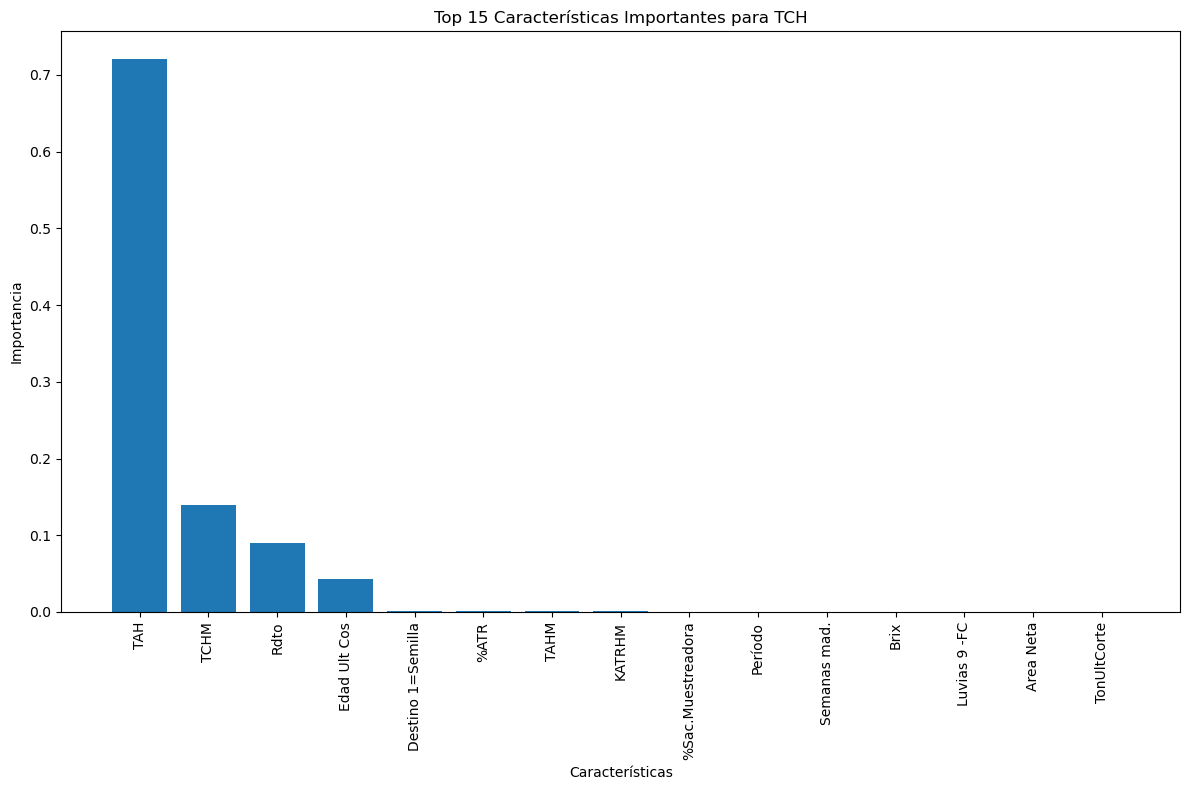

Top 15 características importantes para TCH:
              feature  importance
0                 TAH    0.720707
1                TCHM    0.138810
2                Rdto    0.089939
3        Edad Ult Cos    0.042468
4   Destino 1=Semilla    0.001684
5                %ATR    0.001299
6                TAHM    0.000963
7              KATRHM    0.000756
8   %Sac.Muestreadora    0.000293
9             Período    0.000231
10       Semanas mad.    0.000184
11               Brix    0.000164
12       Luvias 9 -FC    0.000163
13          Area Neta    0.000157
14        TonUltCorte    0.000142


In [135]:
plot_feature_importance(importance_tch, 'TCH')

# imprimir las 15 características más importantes para TCH
print("Top 15 características importantes para TCH:")
print(importance_tch.head(15))

Es evidente que las siguientes características tienen un nivel de importancia significativo para la variable objetivo **TCH**:
* **TAH**: Con un nivel de importancia de $0.720707$ es la característica más importante, la que más contribuye.
* **TCHM**: Con un nivel de importancia de $0.138810$.
* **Rdto**: Con un nivel de importancia de $0.089939$.
* **Edad Ult Cos**: Con un nivel de importancia de $0.042468$.

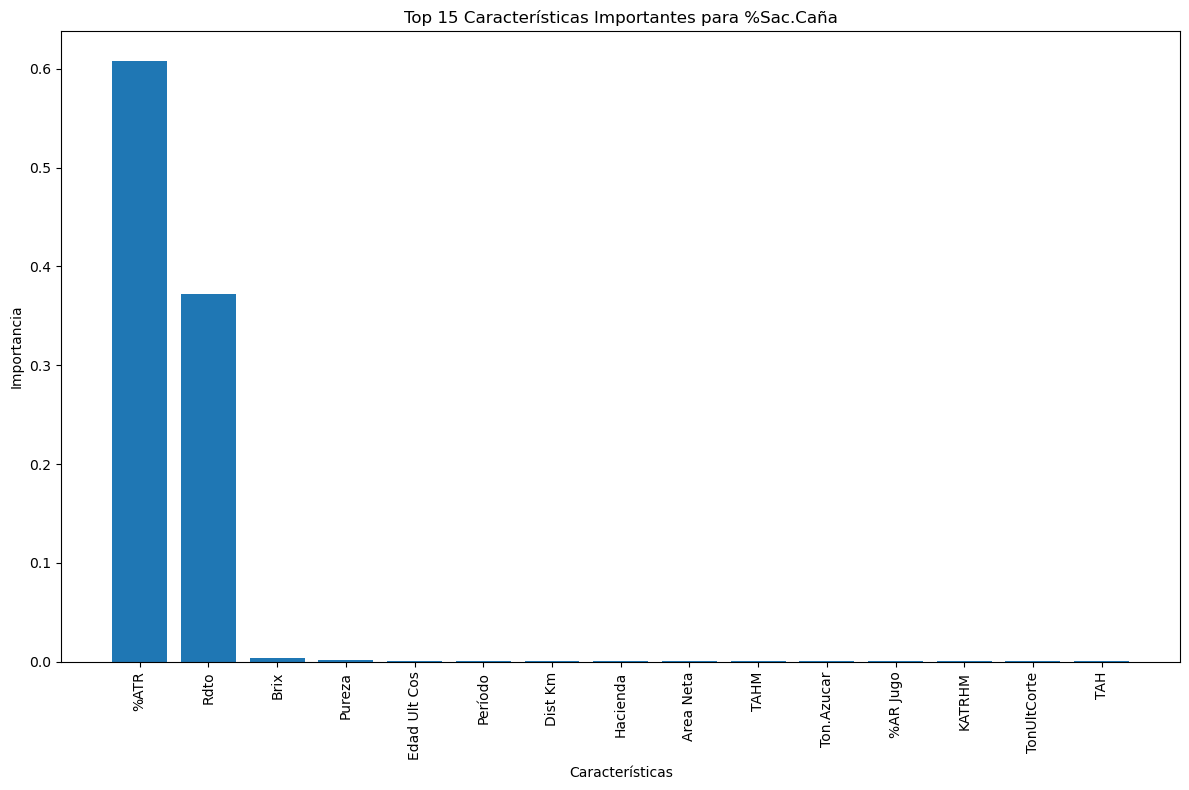


Top 15 características importantes para %Sac.Caña:
         feature  importance
0           %ATR    0.607388
1           Rdto    0.372201
2           Brix    0.004363
3         Pureza    0.001794
4   Edad Ult Cos    0.001234
5        Período    0.001125
6        Dist Km    0.001062
7       Hacienda    0.000981
8      Area Neta    0.000778
9           TAHM    0.000690
10    Ton.Azucar    0.000671
11      %AR Jugo    0.000645
12        KATRHM    0.000612
13   TonUltCorte    0.000532
14           TAH    0.000473


In [137]:
plot_feature_importance(importance_sac, '%Sac.Caña')

# imprimir las 15 características más importantes para %Sac.Caña
print("\nTop 15 características importantes para %Sac.Caña:")
print(importance_sac.head(15))

Es evidente que las siguientes características tienen un nivel de importancia significativo para la variable objetivo **%Sac.Caña**:
* **%ATR**: Con un nivel de importancia de $0.607388$ es la característica más importante, la que más contribuye.
* **Rdto**: Con un nivel de importancia de $0.372201$.

Así, podemos analizar estas variables de mayor importancia y encontrar si cuentan con valores atípicos los cuales podemos procesar:

#### **Para TCH**

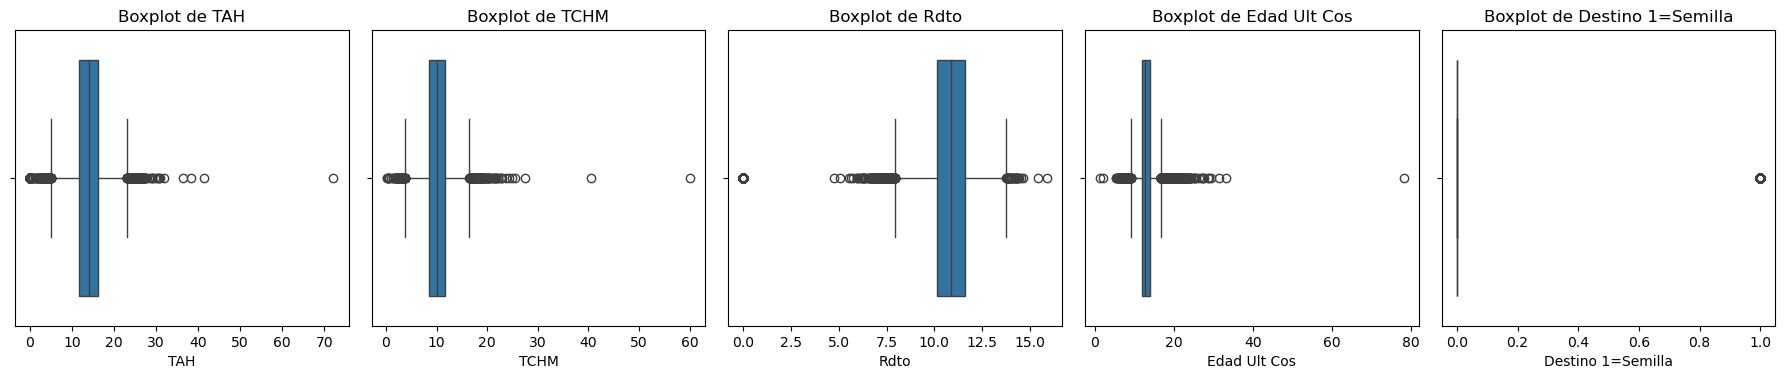

In [246]:
# boxplots para las características más importantes
top_features = importance_tch['feature'][:5]  # top 5
plt.figure(figsize=(18, 7))

for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 5, i)
    sns.boxplot(x=df_clean[feature])
    plt.title(f'Boxplot de {feature}')

plt.tight_layout()
plt.show()

#### **Para %Sac.Caña**

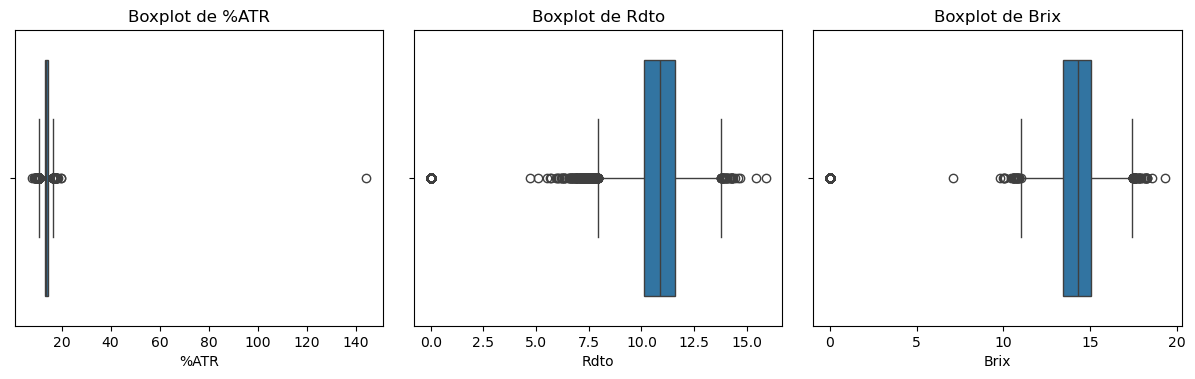

In [242]:
# boxplots para las características más importantes
top_features = importance_sac['feature'][:3]  # top 3
plt.figure(figsize=(20, 7))

for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 5, i)
    sns.boxplot(x=df_clean[feature])
    plt.title(f'Boxplot de {feature}')

plt.tight_layout()
plt.show()

Analicemos cada una de las escalas de las características y sus valores máximos y mínimos para así hallar si estos valores atípicos se encuentran fuera del rango debido o no:

Así pues, decidimos mantener todos estos datos, ya que representan información valiosa acerca de cada una de las características respecto a los registros, pues, a pesar de ser valores muy grandes o muy pequeños respecto al resto, no se encuentran fuera del rango de la variable y no es necesario colocar un límite.

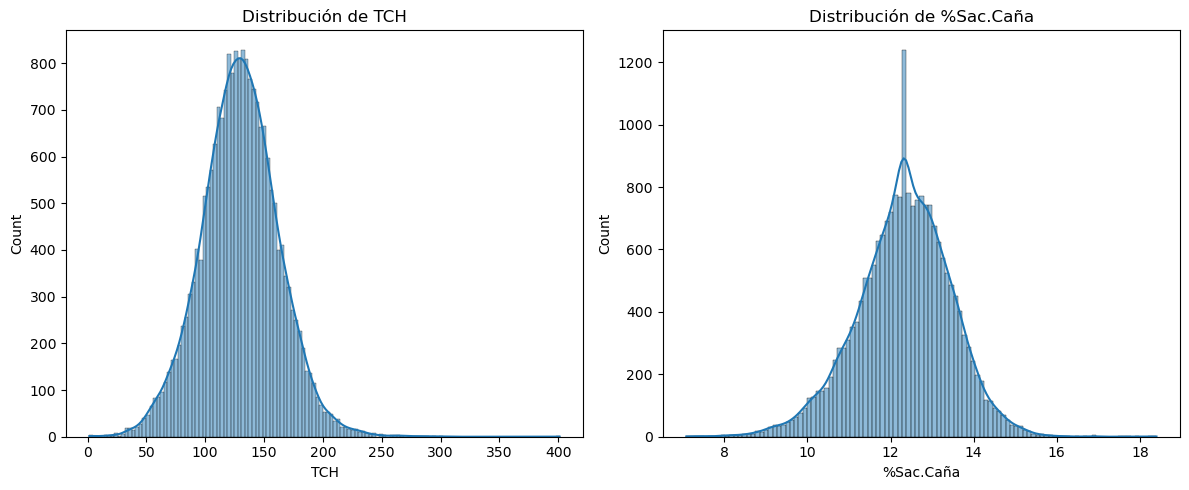

In [115]:
# visualización de la distribución de TCH y %Sac.Caña
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_clean['TCH'], kde=True)
plt.title('Distribución de TCH')
plt.subplot(1, 2, 2)
sns.histplot(df_clean['%Sac.Caña'], kde=True)
plt.title('Distribución de %Sac.Caña')
plt.tight_layout()
plt.show()

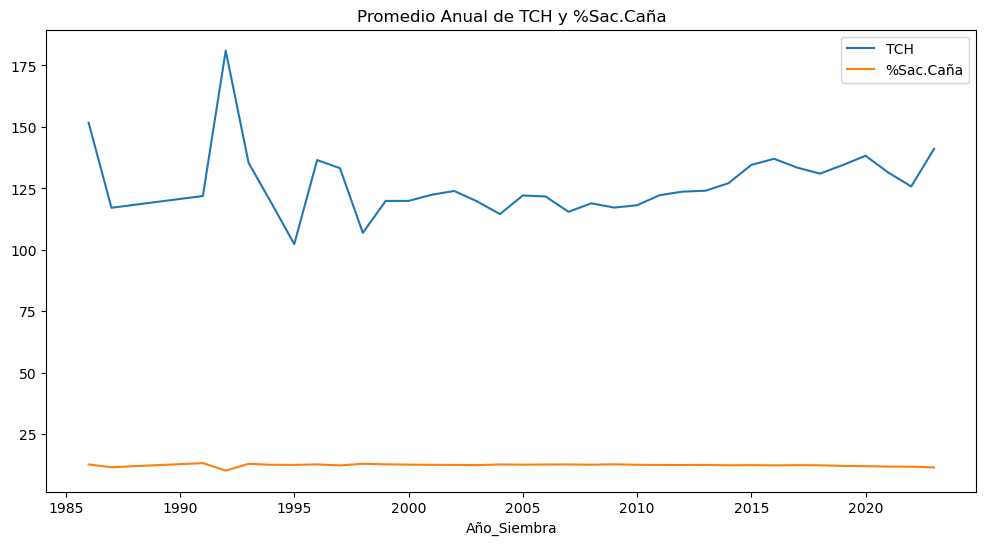

In [117]:
# 5. Análisis temporal
df_clean['F.Siembra'] = pd.to_datetime(df_clean['F.Siembra'])
df_clean['Año_Siembra'] = df_clean['F.Siembra'].dt.year
yearly_avg = df_clean.groupby('Año_Siembra')[['TCH', '%Sac.Caña']].mean()
yearly_avg.plot(figsize=(12, 6))
plt.title('Promedio Anual de TCH y %Sac.Caña')
plt.show()

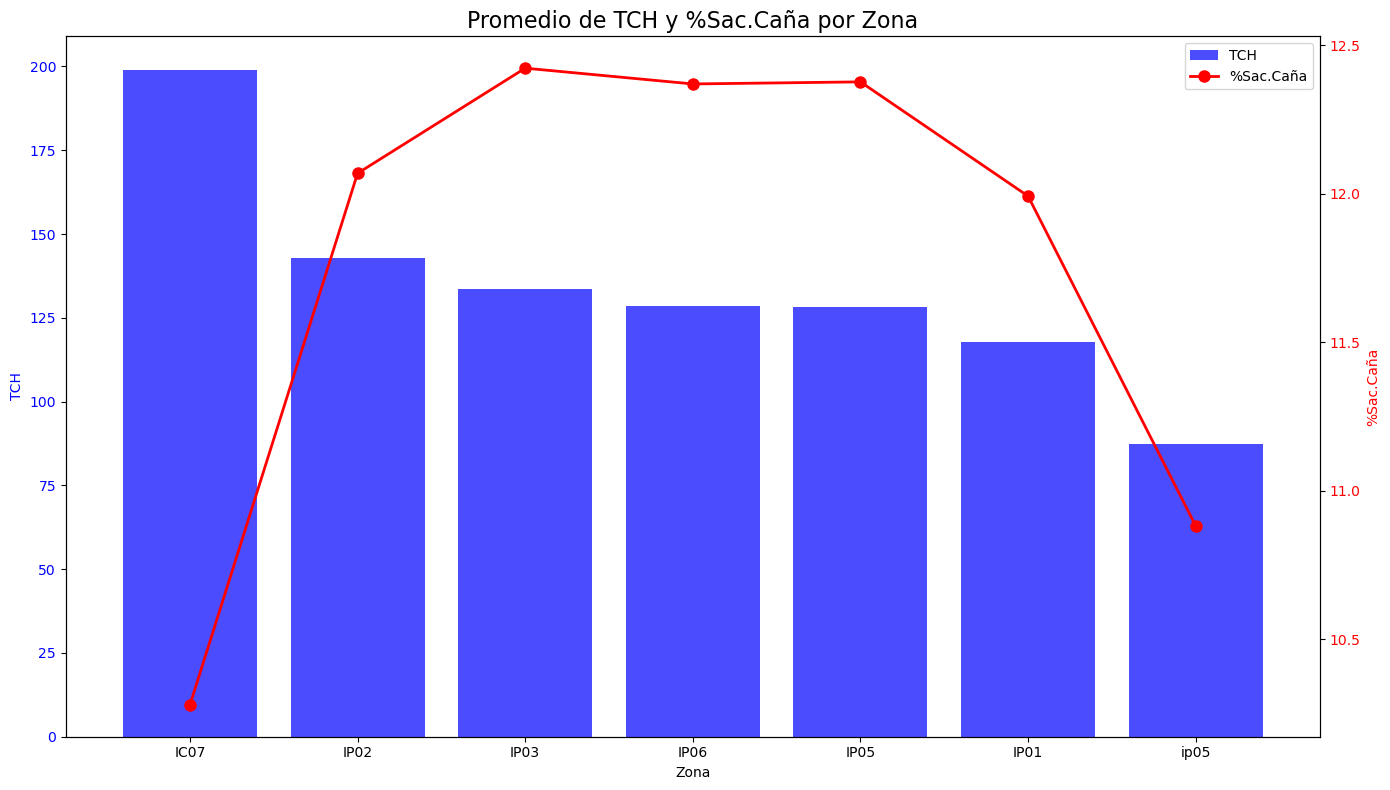

             TCH  %Sac.Caña
Zona                       
IC07  199.036144  10.279000
IP02  142.757188  12.068888
IP03  133.639369  12.422988
IP06  128.575193  12.369849
IP05  128.338835  12.376857
IP01  117.828414  11.992219
ip05   87.402758  10.881829


In [250]:
# análisis por zona
zone_avg = df_clean.groupby('Zona')[['TCH', '%Sac.Caña']].mean().sort_values('TCH', ascending=False)

fig, ax1 = plt.subplots(figsize=(14, 8))

ax1.bar(zone_avg.index, zone_avg['TCH'], color='b', alpha=0.7, label='TCH')
ax1.set_xlabel('Zona')
ax1.set_ylabel('TCH', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(zone_avg.index, zone_avg['%Sac.Caña'], color='r', marker='o', linestyle='-', linewidth=2, markersize=8, label='%Sac.Caña')
ax2.set_ylabel('%Sac.Caña', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Promedio de TCH y %Sac.Caña por Zona', fontsize=16)
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

print(zone_avg)

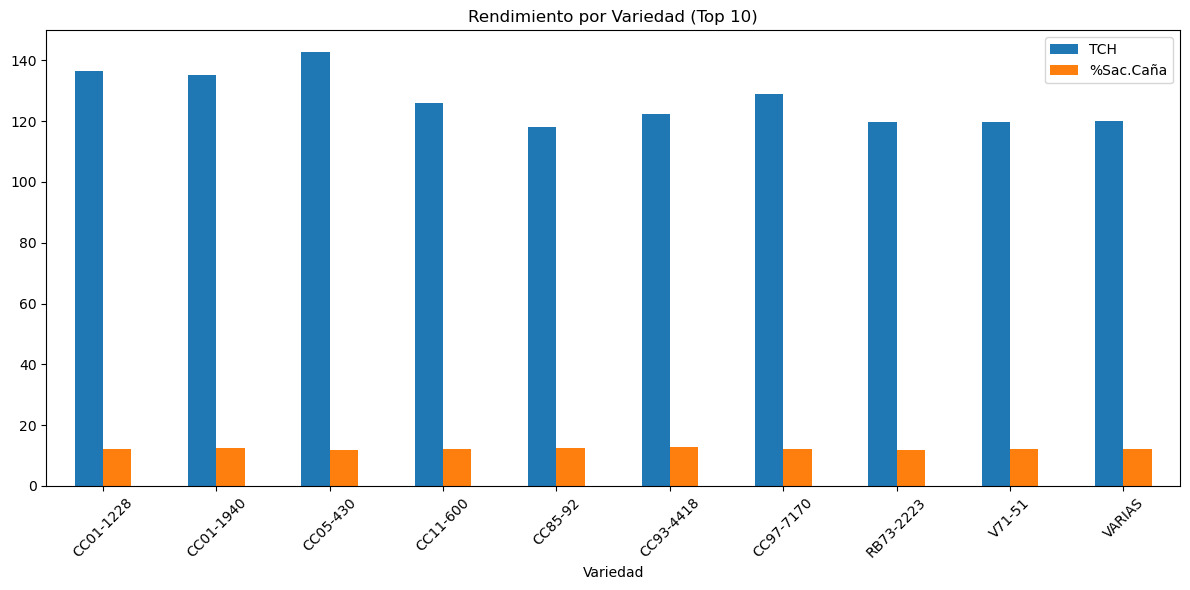

In [123]:
# 9. Análisis de variedades
top_varieties = df_clean['Variedad'].value_counts().nlargest(10).index
variety_performance = df_clean[df_clean['Variedad'].isin(top_varieties)].groupby('Variedad')[['TCH', '%Sac.Caña']].mean()
variety_performance.plot(kind='bar', figsize=(12, 6))
plt.title('Rendimiento por Variedad (Top 10)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

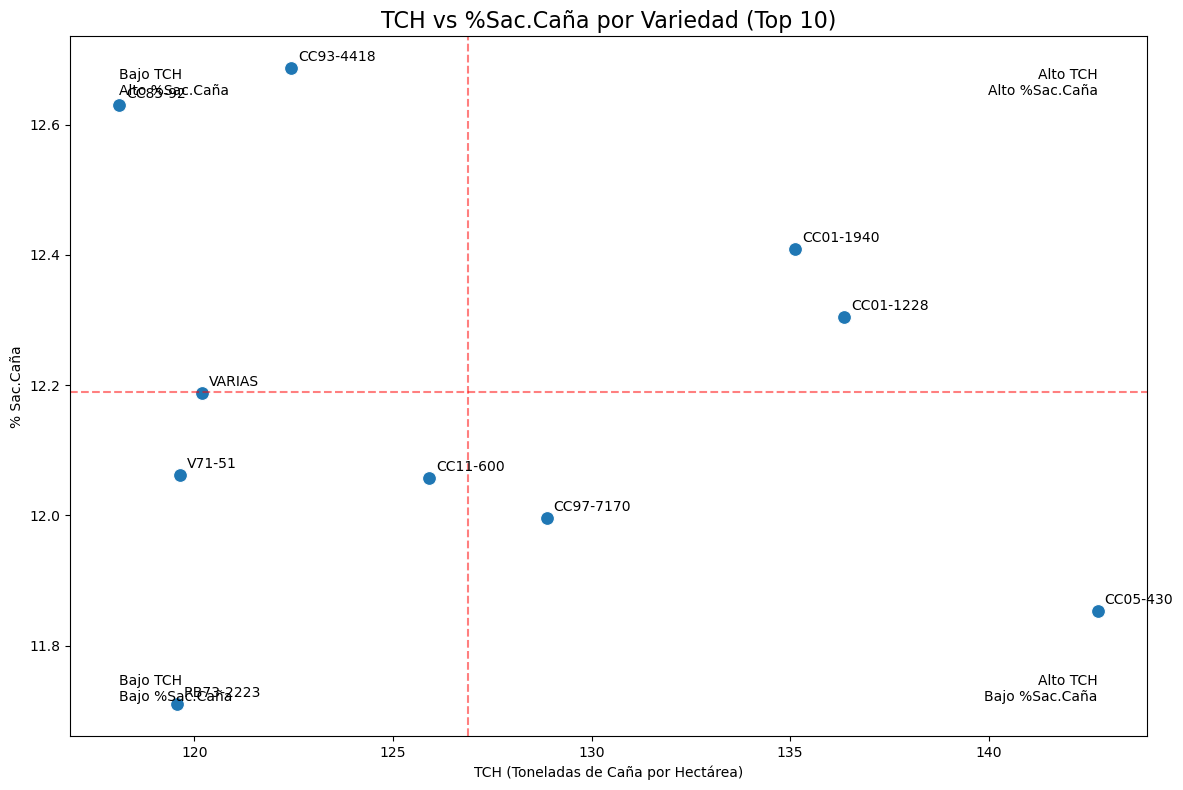

                  TCH  %Sac.Caña
Variedad                        
CC01-1228  136.353568  12.304162
CC01-1940  135.128052  12.408407
CC05-430   142.739919  11.853925
CC11-600   125.910113  12.057075
CC85-92    118.109763  12.629475
CC93-4418  122.434187  12.686649
CC97-7170  128.868507  11.995581
RB73-2223  119.560057  11.710029
V71-51     119.646840  12.061828
VARIAS     120.182015  12.188573


In [211]:
# 10 variedades más comunes
top_varieties = df_clean['Variedad'].value_counts().nlargest(10).index

# rendimiento promedio para estas variedades
variety_performance = df_clean[df_clean['Variedad'].isin(top_varieties)].groupby('Variedad')[['TCH', '%Sac.Caña']].mean()

# gráfico de dispersión
plt.figure(figsize=(12, 8))
sns.scatterplot(x='TCH', y='%Sac.Caña', data=variety_performance, s=100)

# etiquetas para cada punto
for idx, row in variety_performance.iterrows():
    plt.annotate(idx, (row['TCH'], row['%Sac.Caña']), xytext=(5,5), textcoords='offset points')

# líneas de referencia para los promedios
plt.axvline(variety_performance['TCH'].mean(), color='r', linestyle='--', alpha=0.5)
plt.axhline(variety_performance['%Sac.Caña'].mean(), color='r', linestyle='--', alpha=0.5)


plt.title('TCH vs %Sac.Caña por Variedad (Top 10)', fontsize=16)
plt.xlabel('TCH (Toneladas de Caña por Hectárea)')
plt.ylabel('% Sac.Caña')

# cuadrantes
plt.text(variety_performance['TCH'].max(), variety_performance['%Sac.Caña'].max(), 'Alto TCH\nAlto %Sac.Caña', 
         horizontalalignment='right', verticalalignment='top')
plt.text(variety_performance['TCH'].min(), variety_performance['%Sac.Caña'].max(), 'Bajo TCH\nAlto %Sac.Caña', 
         horizontalalignment='left', verticalalignment='top')
plt.text(variety_performance['TCH'].max(), variety_performance['%Sac.Caña'].min(), 'Alto TCH\nBajo %Sac.Caña', 
         horizontalalignment='right', verticalalignment='bottom')
plt.text(variety_performance['TCH'].min(), variety_performance['%Sac.Caña'].min(), 'Bajo TCH\nBajo %Sac.Caña', 
         horizontalalignment='left', verticalalignment='bottom')

plt.tight_layout()
plt.show()

print(variety_performance)